<a href="https://colab.research.google.com/github/benny-png/transformer-Based-OCR-TrOCR-printed-and-handwritten-images/blob/main/Transformer_OCR_(TrOCR)_handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#HAND WRITTEN BASED OCR

from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import numpy as np
import torch



In [19]:
# Initialize the processor and model
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-handwritten')


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Image shape: (332, 410, 3)
Detected text: becausing
The image used :


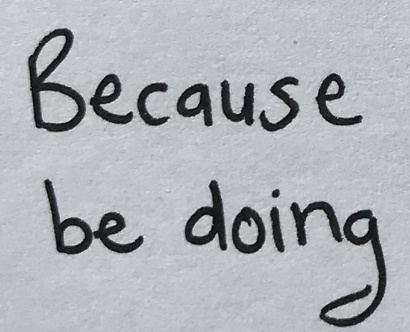

In [28]:
# Load and preprocess the image
#THE IMAGE SHOULD ONLY CONTAIN IN LINE TEXT HERE

image_path = '/content/drive/MyDrive/TrOCR/handwritten.jpeg' #/content/drive/MyDrive/TrOCR/Screenshot 2024-07-31 210419.png
image = Image.open(image_path).convert("RGB")

# Convert image to a NumPy array
image_np = np.array(image)

# Check the shape of the image array to ensure it is (H, W, C)
print(f"Image shape: {image_np.shape}")



# Preprocess the image
pixel_values = processor(images=image_np, return_tensors="pt").pixel_values

# Generate text from the image
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("Detected text: " + generated_text)

#display the image
print("The image used :")
image


In [21]:
#this is universal as it draws the bounding boxes using Pytesseract then perform OCR using TrOCR

# Ensure you have pytesseract installed
!apt-get install -y tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [22]:
# Import required packages
import cv2
import pytesseract
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

In [23]:
# Path to the image
image_path = "/content/drive/MyDrive/TrOCR/output-1.png"

def preprocess_image(image_path):
    # Read image from which text needs to be extracted
    img = cv2.imread(image_path)

    # Convert the image to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Perform OTSU threshold
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

    # Specify structure shape and kernel size
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

    # Apply dilation on the threshold image
    dilation = cv2.dilate(thresh1, rect_kernel, iterations=1)

    # Find contours
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    return img, contours

img, contours = preprocess_image(image_path)


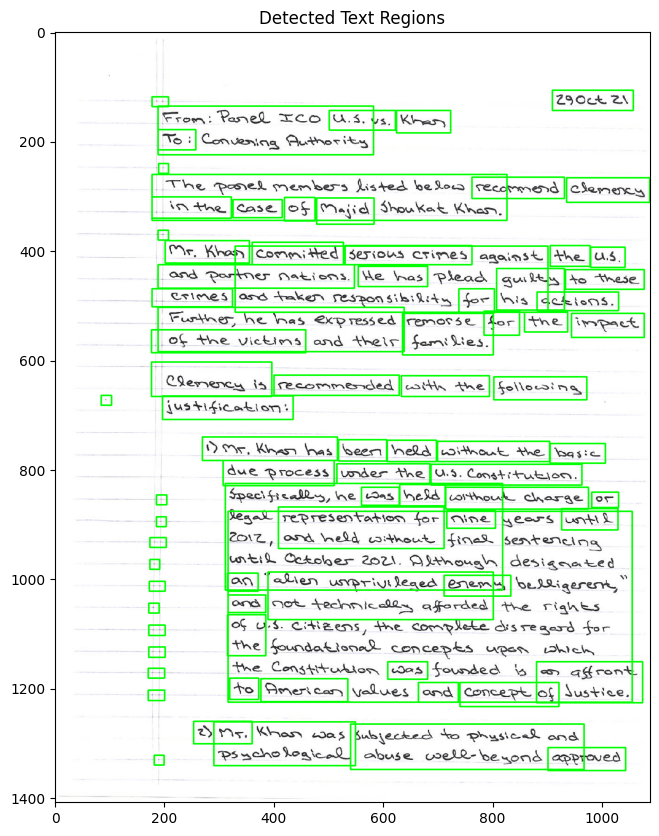

In [24]:
def display_bounding_boxes(img, contours):
    # Create a copy of the image
    im2 = img.copy()

    # Iterate through the contours and draw bounding boxes
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        # Draw the bounding box on the image
        cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
    plt.title('Detected Text Regions')
    plt.show()

display_bounding_boxes(img, contours)


In [25]:
def recognize_text(img, contours):
    # Initialize results list
    results = []
    im2 = img.copy()

    # Iterate through the contours, crop the detected text regions, and recognize text
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        # Crop the detected text region
        cropped_image = img[y:y+h, x:x+w]
        cropped_image_pil = Image.fromarray(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)).convert("RGB")

        # Preprocess the cropped image
        pixel_values = processor(images=cropped_image_pil, return_tensors="pt").pixel_values

        # Generate text
        generated_ids = model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

        results.append(generated_text)
        print(generated_text)

        # Draw bounding box and recognized text on the image
        cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(im2, generated_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)

    return im2, results

# Recognize text and display the image with bounding boxes and recognized text
im2, results = recognize_text(img, contours)


0 0
approved.
subjected to keep-background and
psychological
2 ) Mr.
to
concept of
and
American
to
tt.
of justice.
was
of
of
the U
s...
and
to
enemy.
an
not-surprisingly attended
s
it #
s...
1907 08
nine.
until.
and negotiation for
s
or
without charge.
was
held.
1907
U.S. Constitution.
under the
due process.
basic.
without the
held.
been.
10 Mr. Khazi has
justification :
6
following.
with the
recommended.
Clemency is
# of the victims.
impact.
families.
the
for
of the victims and their
actions.
for
crimes.
to these.
" guilty.
He has
and partner nations.
u.b.
1908 #
the
serious crimes.
committed.
Mr. Khan.
s...
case.
majid.
of
in the
clemency.
recommend.
in the people of unboysid should take him.
s
To :
Khenn.
U.S. vs.
To : convening authority.
it.
290ct 21.


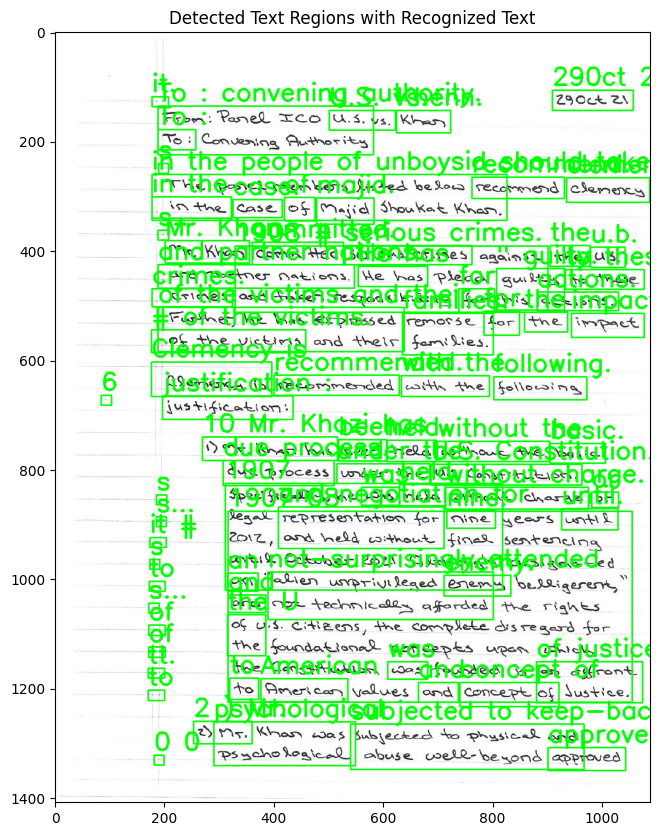

In [26]:
# Display the image with bounding boxes and recognized text
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.title('Detected Text Regions with Recognized Text')
plt.show()


In [27]:
# Print the results list
print(results)

# Join the recognized text in reverse order
reversed_text = ' '.join(results[::-1])
print(reversed_text)


['0 0', 'approved.', 'subjected to keep-background and', 'psychological', '2 ) Mr.', 'to', 'concept of', 'and', 'American', 'to', 'tt.', 'of justice.', 'was', 'of', 'of', 'the U', 's...', 'and', 'to', 'enemy.', 'an', 'not-surprisingly attended', 's', 'it #', 's...', '1907 08', 'nine.', 'until.', 'and negotiation for', 's', 'or', 'without charge.', 'was', 'held.', '1907', 'U.S. Constitution.', 'under the', 'due process.', 'basic.', 'without the', 'held.', 'been.', '10 Mr. Khazi has', 'justification :', '6', 'following.', 'with the', 'recommended.', 'Clemency is', '# of the victims.', 'impact.', 'families.', 'the', 'for', 'of the victims and their', 'actions.', 'for', 'crimes.', 'to these.', '" guilty.', 'He has', 'and partner nations.', 'u.b.', '1908 #', 'the', 'serious crimes.', 'committed.', 'Mr. Khan.', 's...', 'case.', 'majid.', 'of', 'in the', 'clemency.', 'recommend.', 'in the people of unboysid should take him.', 's', 'To :', 'Khenn.', 'U.S. vs.', 'To : convening authority.', 'it